# Passed Pawn

In [1]:

from stockfish_explain.utils.concepts import (
    evaluate_concepts_one,
    classification_cost,

)
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.linear_model import RidgeClassifier, Ridge, LogisticRegression
from lightgbm import LGBMClassifier, LGBMRegressor

from sklearn.metrics import r2_score



regression_models = [
    Ridge(),
    MLPRegressor(solver='adam', alpha=1e-4, hidden_layer_sizes=(100, 10), random_state=1, max_iter=1000),
    LGBMRegressor()
]

classification_models = [
    RidgeClassifier(),
    MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(100, 10), random_state=1, max_iter=1000, early_stopping=True),
    LGBMClassifier(),
]

concepts = [
    'c_passed_pawns',
 ]




In [2]:
#metric = r2_score
metric = classification_cost
db_name = 'stockfish_data_05'

results_classification = []
for concept in concepts:
    for model in classification_models:

        result = evaluate_concepts_one(
            model,
            metric,
            db_name,
            under_sample=True,
            buckets=["all"],
            drop_zero_values=True,
            regression_to_classification=True,
            inspect_layer=[10,1,2],
            target=concept,
            test_size=0.3,
            num_splits=1,
            print_class_ballance=  True
        )
        results_classification.append(result)

# pickle results with
#  timestamp in string
import pickle
import datetime
file_string = f"results_{datetime.datetime.now()}.pkl"
with open(file_string, "wb") as f:
    pickle.dump(results_classification, f)

print(f'saved file: {file_string}')

  0%|                                                     | 0/1 [00:00<?, ?it/s]20-Dec-22 09:15:54 — root — INFO — starting RidgeClassifier official c_passed_pawns 10 all
20-Dec-22 09:16:11 — root — INFO — dropping zero values
20-Dec-22 09:16:11 — root — INFO — X shape: (36112, 45056)
20-Dec-22 09:16:11 — root — INFO — regression to classification
20-Dec-22 09:16:11 — root — INFO — Class distributions: (array([0, 1]), array([17901, 18211]))
20-Dec-22 09:16:11 — root — INFO — Undersampling...
20-Dec-22 09:16:11 — root — INFO — X shape: (35802, 45056)
20-Dec-22 09:16:11 — root — INFO — Class distributions: (array([0, 1]), array([17901, 17901]))
20-Dec-22 09:16:13 — root — INFO — Limiting to 10k samples
20-Dec-22 09:16:13 — root — INFO — X shape: (10000, 45056)
20-Dec-22 09:16:13 — root — INFO — Class distributions: (array([0, 1]), array([5013, 4987]))
20-Dec-22 09:16:16 — root — INFO — Epoch 0 score: 0.08933333333333326 (skipping)
20-Dec-22 09:16:19 — root — INFO — Epoch 1 score: 0.08933

saved file: results_2022-12-20 09:19:57.326023.pkl


In [7]:
df

,layer,model_name,bucket,target,score,training_size
0,10,RidgeClassifier,all,c_passed_pawns,1.000000,10000.0
1,1,RidgeClassifier,all,c_passed_pawns,0.623685,35802.0
2,2,RidgeClassifier,all,c_passed_pawns,0.024672,35802.0
3,10,MLPClassifier,all,c_passed_pawns,1.000000,10000.0
4,1,MLPClassifier,all,c_passed_pawns,0.746579,35802.0
5,2,MLPClassifier,all,c_passed_pawns,0.015175,35802.0
6,10,LGBMClassifier,all,c_passed_pawns,1.000000,10000.0
7,1,LGBMClassifier,all,c_passed_pawns,0.754958,35802.0
8,2,LGBMClassifier,all,c_passed_pawns,0.044223,35802.0
9,10,NaN,all,c_passed_pawns,NaN,NaN


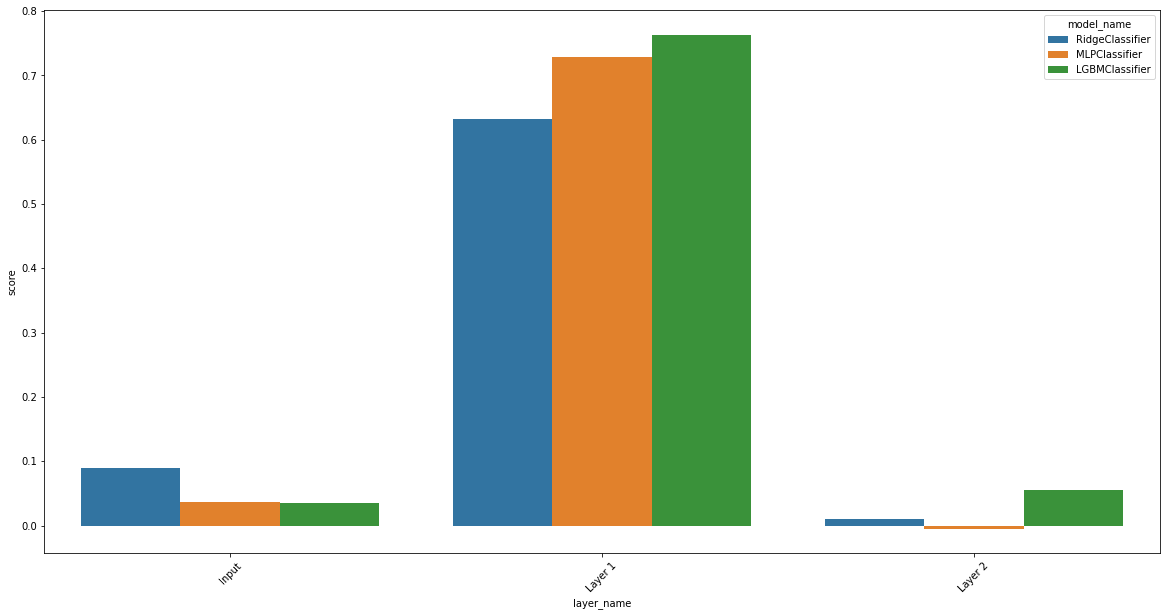

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# create list from list of lists results
results = [item for sublist in results_classification for item in sublist]
df = pd.DataFrame(results)


layer_name_dict = {1:'Layer 1', 2 : 'Layer 2', 10: 'Input'}
df['layer_name'] = df.layer.apply(lambda x: layer_name_dict[x])
# Create bar plot for each layer
# where x is target, y is score, hue is model_name

# set matplotlib size
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x='layer_name', y='score', hue='model_name', data=df)
plt.xticks(rotation=45)
plt.show()

In [2]:
metric = r2_score
db_name = 'stockfish_data_05'

results_regression = []
for concept in concepts:
    for model in regression_models:

        result = evaluate_concepts_one(
            model,
            metric,
            db_name,
            under_sample=False,
            buckets=["all"],
            drop_zero_values=True,
            regression_to_classification=False,
            inspect_layer=[10,1,2],
            target=concept,
            test_size=0.3,
            num_splits=1,
        )
        results_regression.append(result)

# pickle results with
#  timestamp in string
import pickle
import datetime
file_string = f"results_{datetime.datetime.now()}.pkl"
with open(file_string, "wb") as f:
    pickle.dump(results_regression, f)

print(f'saved file: {file_string}')

  0%|                                                     | 0/1 [00:00<?, ?it/s]19-Dec-22 10:14:52 — root — INFO — starting Ridge official c_passed_pawns 10 all
19-Dec-22 10:15:09 — root — INFO — dropping zero values
19-Dec-22 10:15:09 — root — INFO — X shape: (36112, 45056)
19-Dec-22 10:15:09 — root — INFO — Limiting to 10k samples
19-Dec-22 10:15:09 — root — INFO — X shape: (10000, 45056)
19-Dec-22 10:15:13 — root — INFO — Epoch 0 score: -0.03208781158816221 (skipping)
19-Dec-22 10:15:16 — root — INFO — Epoch 1 score: -0.03208781158816221 (skipping)
19-Dec-22 10:15:16 — root — INFO — score: -0.03208781158816221
19-Dec-22 10:15:16 — root — INFO — starting Ridge official c_passed_pawns 1 all
19-Dec-22 10:15:23 — root — INFO — dropping zero values
19-Dec-22 10:15:23 — root — INFO — X shape: (36112, 2064)
19-Dec-22 10:15:23 — root — INFO — score: 0.6615614124050653
19-Dec-22 10:15:23 — root — INFO — starting Ridge official c_passed_pawns 2 all
19-Dec-22 10:15:30 — root — INFO — dropping 

saved file: results_2022-12-19 10:40:44.610354.pkl


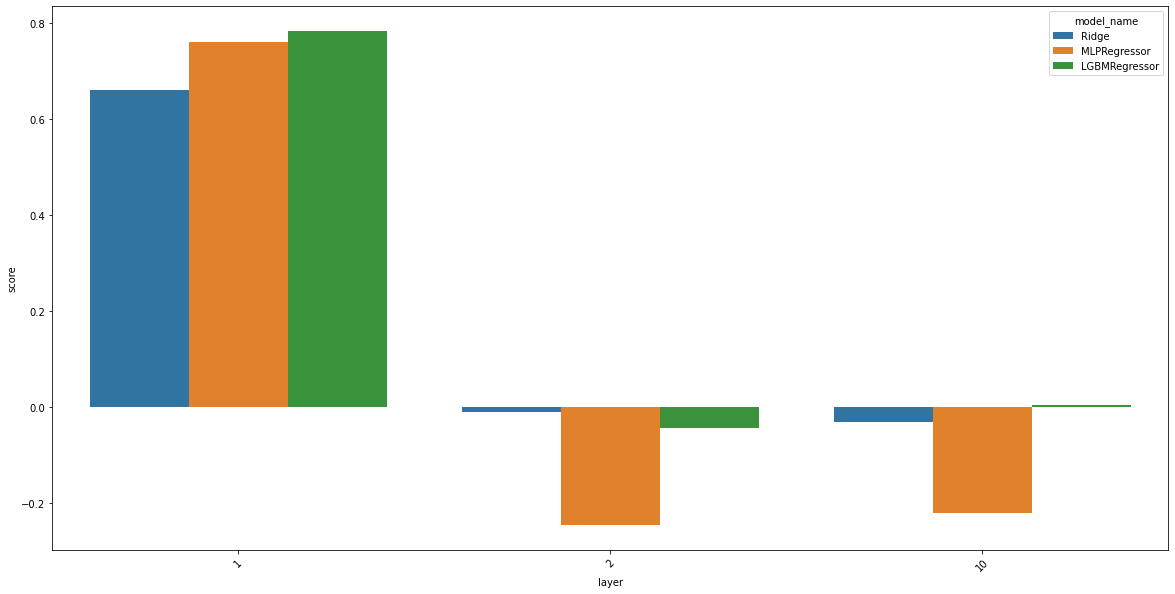

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# create list from list of lists results
results = [item for sublist in results_regression for item in sublist]
df = pd.DataFrame(results)

# Create bar plot for each layer
# where x is target, y is score, hue is model_name

# set matplotlib size
plt.rcParams['figure.figsize'] = [20, 10]

sns.barplot(x='layer', y='score', hue='model_name', data=df)
plt.xticks(rotation=45)
plt.show()